In [40]:
import pandas as pd

df = pd.read_csv("sample_users.csv")
print(df.head())

   user_id name    lifestyle  \
0        1  さやか  インフルエンサー系OL   
1        2  イサム      アーティスト系   
2        3  コウタ         オタク系   
3        4  マコト      ロジカル会社員   
4        5  アオイ    自然派スローライフ   

                                                post  
0  昼休みにふらっと入ったカフェが映えすぎてやばい☕✨ タスク山盛りだけど癒された〜 #カフェ巡...  
1  制作というのは、暴力だ。かたちにしてしまった時点で、感覚は既に死んでいる。だから僕は、毎晩“...  
2  今期アニメ、まさかの伏線回収で鳥肌立った…！キャラの台詞一つひとつが匂わせだったんだな…。こ...  
3  来週の進捗レビュー前にフェーズ2のリソース見直し要。タスク分解が甘かったか…。今日中にKPI...  
4  朝5時に目覚めて、白湯を飲みながら呼吸を整える時間。今日の自分が“満ちる”選択をしたい。静け...  


In [41]:
import spacy

nlp = spacy.load("ja_ginza")

text = "今日はカフェで作業して、めちゃくちゃ集中できた！"

doc = nlp(text)

for token in doc:
    print(token.text, token.pos_, token.lemma_)


今日 NOUN 今日
は ADP は
カフェ NOUN カフェ
で ADP で
作業 VERB 作業
し AUX する
て SCONJ て
、 PUNCT 、
めちゃくちゃ ADV めちゃくちゃ
集中 VERB 集中
でき AUX できる
た AUX た
！ PUNCT !


In [42]:
import pandas as pd
import spacy

# CSV読み込み（パスは環境に合わせて調整）
df = pd.read_csv("sample_users.csv")

# GiNZAモデル読み込み
nlp = spacy.load("ja_ginza")

# 投稿ごとに分かち書きして語彙を抽出
def extract_keywords(text):
    doc = nlp(text)
    # 名詞・動詞・形容詞だけ取り出す（必要ならカスタムしてOK）
    words = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB", "ADJ"]]
    return words

# 各投稿に語彙リストを追加
df["tokens"] = df["post"].apply(extract_keywords)
print(df[["name", "lifestyle", "tokens"]].head())




  name    lifestyle                                             tokens
0  さやか  インフルエンサー系OL  [昼休み, 入る, カフェ, 映える, すぎる, やばい, タスク, 山盛り, 癒す, カフ...
1  イサム      アーティスト系  [制作, いう, 暴力, かたち, する, しまう, 時点, 感覚, 死ぬ, いる, 死骸,...
2  コウタ         オタク系  [今期, アニメ, 伏線, 回収, 立つ, キャラ, 台詞, つ, つ, 匂う, 供給量, ...
3  マコト      ロジカル会社員  [来週, 進捗, レビュー, 前, フェーズ, リソース, 見直, し要, タスク, 分解,...
4  アオイ    自然派スローライフ  [朝, 時, 目覚める, 白湯, 飲む, 呼吸, 整える, 時間, 今日, 自分, 満ちる,...


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tokens列（リスト）をスペース区切りの文字列にする（"カフェ 映え 癒す" みたいな感じ）
df["joined_tokens"] = df["tokens"].apply(lambda tokens: " ".join(tokens))

# TF-IDFベクトル化
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["joined_tokens"])

# 単語の一覧（特徴語）を確認
print(vectorizer.get_feature_names_out())

# 結果を表形式にして見やすく
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 名前やライフスタイルと結合して表示
result = pd.concat([df[["name", "lifestyle"]], tfidf_df], axis=1)
print(result.head())


['kpi' 'ある' 'いう' 'いる' 'かたち' 'しまう' 'し要' 'すぎる' 'する' 'ない' 'やばい' 'アニメ' 'カフェ'
 'キャラ' 'タスク' 'フェーズ' 'リズム' 'リソース' 'レビュー' '並べる' '今日' '今期' '伏線' '供給量' '入る'
 '分解' '制作' '匂う' '午後' '反映' '台詞' '呼吸' '回収' '定義' '山盛り' '巡り' '待つ' '感覚' '感謝'
 '整える' '映える' '昼休み' '時点' '時間' '暴力' '来る' '来週' '死ぬ' '死骸' '満ちる' '甘い' '癒す' '白湯'
 '目覚める' '立つ' '自分' '褒美' '見直' '週報' '進捗' '選択' '静けさ' '飲む']
  name    lifestyle       kpi        ある        いう        いる       かたち  \
0  さやか  インフルエンサー系OL  0.000000  0.000000  0.000000  0.000000  0.000000   
1  イサム      アーティスト系  0.000000  0.000000  0.274185  0.274185  0.274185   
2  コウタ         オタク系  0.000000  0.000000  0.000000  0.000000  0.000000   
3  マコト      ロジカル会社員  0.264426  0.000000  0.000000  0.000000  0.000000   
4  アオイ    自然派スローライフ  0.000000  0.247675  0.000000  0.000000  0.000000   

        しまう        し要       すぎる  ...      目覚める        立つ       自分        褒美  \
0  0.000000  0.000000  0.261257  ...  0.000000  0.000000  0.00000  0.261257   
1  0.274185  0.000000  0.000000  ...  0.000000  0.000000

/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/2357603711.py:20: UserWarning: Glyph 26172 (\N{CJK UNIFIED IDEOGRAPH-663C}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/2357603711.py:20: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26172 (\N{CJK UNIFIED IDEOGRAPH-663C}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


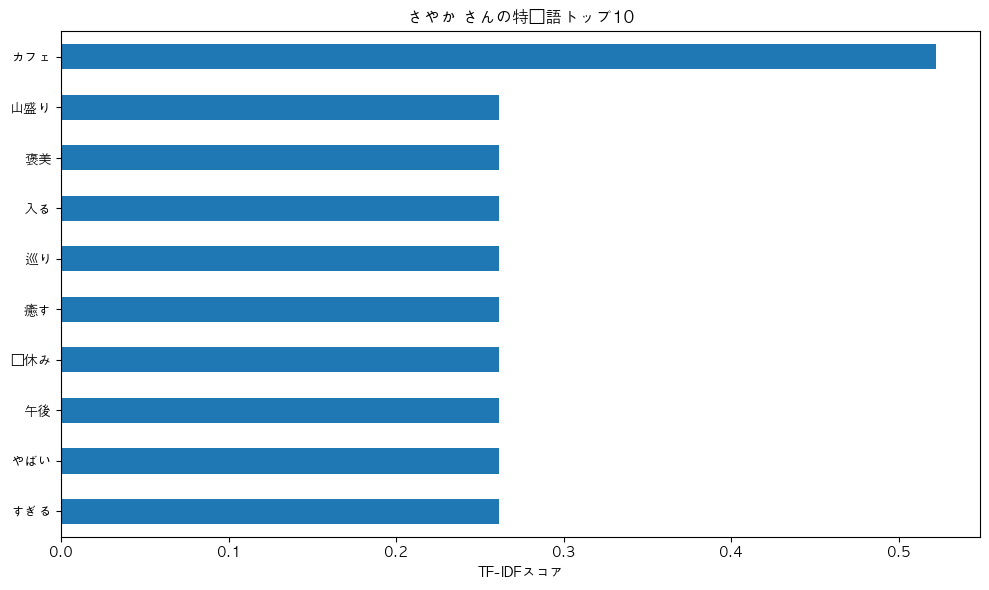

In [44]:
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'AppleGothic'

# 0行目（さやかさん）を対象に、スコアの高い語を抽出
user_index = 0  # ← 他のユーザーを見たいときは数字を変えてね！

# "name"と"lifestyle"は除いて、語彙だけ取り出す
user_vector = result.drop(columns=["name", "lifestyle"]).iloc[user_index]

# スコアの高い順に上位10語を取り出す
top_words = user_vector.sort_values(ascending=False).head(10)

# 横棒グラフで表示
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh')
plt.gca().invert_yaxis()  # 上から順に表示
plt.title(f"{result.loc[user_index, 'name']} さんの特徴語トップ10")
plt.xlabel("TF-IDFスコア")
plt.tight_layout()
plt.show()


In [45]:
from sklearn.cluster import KMeans

# 1. 名前と職業を除いた「特徴語スコア」部分だけ取り出す
X = result.drop(columns=["name", "lifestyle"])

# 2. クラスタ数（グループ数）はとりあえず 3 にしてみる
kmeans = KMeans(n_clusters=3, random_state=0)
result["cluster"] = kmeans.fit_predict(X)

# 3. クラスタごとの分布を表示してみる
print(result[["name", "lifestyle", "cluster"]])


  name    lifestyle  cluster
0  さやか  インフルエンサー系OL        1
1  イサム      アーティスト系        2
2  コウタ         オタク系        0
3  マコト      ロジカル会社員        1
4  アオイ    自然派スローライフ        2


/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/886730894.py:15: UserWarning: Glyph 21250 (\N{CJK UNIFIED IDEOGRAPH-5302}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/886730894.py:15: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/886730894.py:15: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21250 (\N{CJK UNIFIED IDEOGRAPH-5302}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) Appl

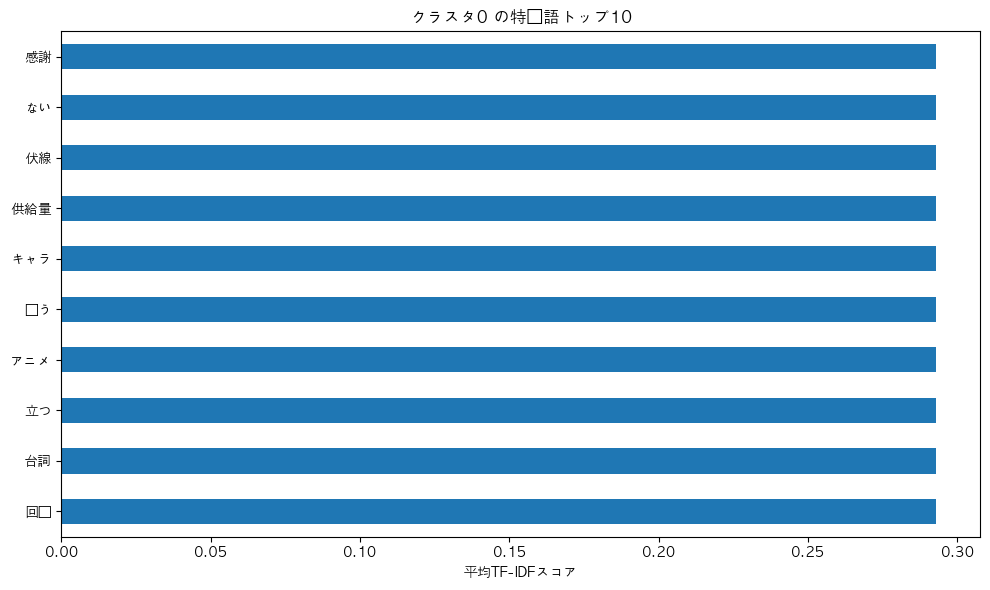

In [46]:
import matplotlib.pyplot as plt
import matplotlib


target_cluster = 0  # ← 変えてもOK！
cluster_data = result[result["cluster"] == target_cluster]
X = cluster_data.drop(columns=["name", "lifestyle", "cluster"])
mean_scores = X.mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
mean_scores.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title(f"クラスタ{target_cluster} の特徴語トップ10")
plt.xlabel("平均TF-IDFスコア")
plt.tight_layout()
plt.show()


クラスタ0 は1人だけなので平均が出ません 🙇‍♂️



/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/3755026787.py:19: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/3755026787.py:19: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/3755026787.py:19: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}

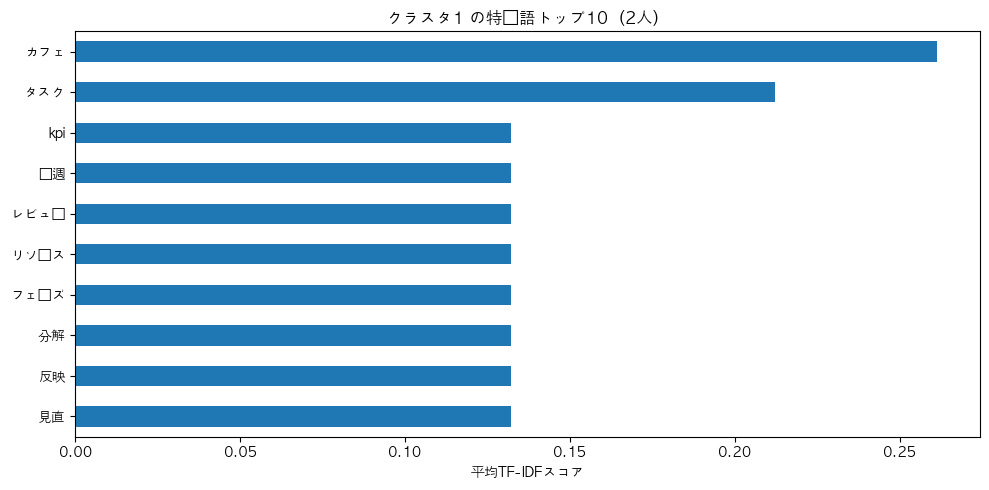

/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/3755026787.py:19: UserWarning: Glyph 35226 (\N{CJK UNIFIED IDEOGRAPH-899A}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/3755026787.py:19: UserWarning: Glyph 20006 (\N{CJK UNIFIED IDEOGRAPH-4E26}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/w8/pwmqglqj11sfcws88pp9b6wm0000gn/T/ipykernel_35306/3755026787.py:19: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35226 (\N{CJK UNIFIED IDEOGRAPH-899A}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/slj-151/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20006 (\N{CJK UNIFIED IDEOGRAPH-4E26}) missing from font(s) A

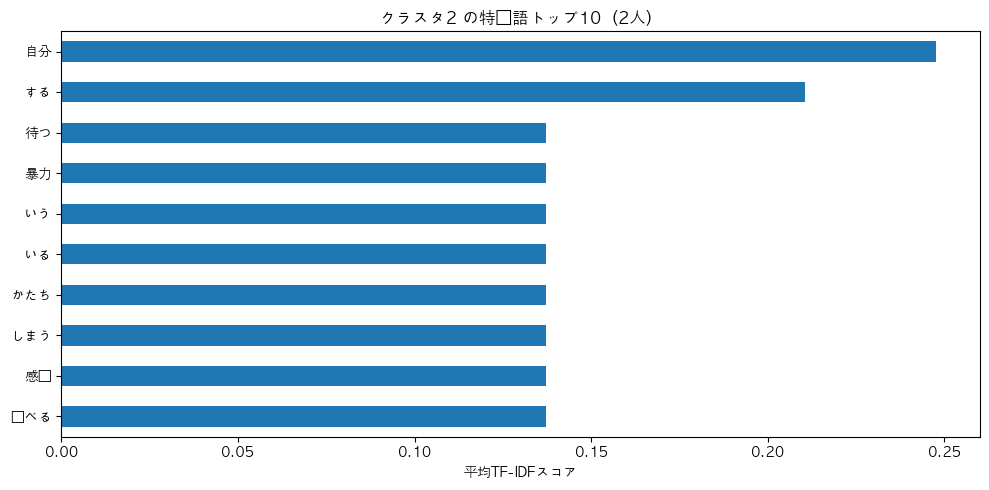

In [50]:
# クラスタ数（今は3）
n_clusters = result["cluster"].nunique()

for target_cluster in range(n_clusters):
    cluster_data = result[result["cluster"] == target_cluster]
    X = cluster_data.drop(columns=["name", "lifestyle", "cluster"])
    
    if len(cluster_data) <= 1:
        print(f"クラスタ{target_cluster} は{len(cluster_data)}人だけなので平均が出ません 🙇‍♂️\n")
        continue

    mean_scores = X.mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(10, 5))
    mean_scores.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f"クラスタ{target_cluster} の特徴語トップ10（{len(cluster_data)}人）")
    plt.xlabel("平均TF-IDFスコア")
    plt.tight_layout()
    plt.show()


In [51]:
import joblib
import os

# 保存先フォルダがなければ作成
os.makedirs("models", exist_ok=True)

# すでに使ってる vectorizer と kmeans を保存
joblib.dump(vectorizer, "models/vectorizer.joblib")
joblib.dump(kmeans, "models/kmeans_model.joblib")

print("✅ モデル保存完了！")


✅ モデル保存完了！
